In [1]:
import math
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import control

from control import tf, tfdata
from control.matlab import *
from scipy.integrate import odeint

from Modules import Modules


%matplotlib inline

print("OK\n")

OK



In [13]:
modules = Modules('')

plt.rcParams['font.family'] ='sans-serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.xmargin'] = '0'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'

In [28]:
g = 9.81
l = 0.23
M = 2.0
mu = 1.5e-2
J = 1.0e-2

P = tf([0, 1], [J, mu, M*g*l])

ref = 30

In [29]:
def P_Control(kp, max):
    try:
        LS = modules.linestyle_generator()
        fig, ax = plt.subplots()
        for i in range(3):
            K = tf([0, kp[i]], [0, 1])
            Gyr = feedback(P * K, 1)
            y,t = step(Gyr, np.arange(0, max, 0.01))

            pltargs = {'ls': next(LS), 'label': '$K_P$='+str(kp[i])}
            ax.plot(t, y * ref, **pltargs)
        ax.axhline(ref, color="k", linewidth = 0.5)
        modules.plot_set(ax, 't', 'y', 'best')
    except NameError as err:
        print("NameError: {0}".format(err))
    except TypeError as err:
        print("TypeError: {0}".format(err))
    except ValueError as err:
        print("ValueError: {0}".format(err))
    except OSError as err:
        print("OS error: {0}".format(err))
    except BaseException as err:
        print(f"Unexpected {err=}, {type(err)=}")
        raise

In [30]:
def bord_P(kp, param):
    try:
        LS = modules.linestyle_generator()
        fig, ax = plt.subplots(2, 1)
        for i in range(len(kp)):
            K = tf([0, kp[i]], [0, 1])
            Gyr = feedback(P * K, 1)
            gain, phase, w = bode(Gyr, logspace(-1, param), plot=False)
        
            pltargs = {'ls': next(LS), 'label': '$k_P$' + str(kp[i])}
            ax[0].semilogx(w, 20 * np.log10(gain), **pltargs)
            ax[1].semilogx(w, (phase * (180/np.pi)), **pltargs)
        modules.bodeplot_set(ax, 'lower left')
    except NameError as err:
        print("NameError: {0}".format(err))
    except TypeError as err:
        print("TypeError: {0}".format(err))
    except ValueError as err:
        print("ValueError: {0}".format(err))
    except OSError as err:
        print("OS error: {0}".format(err))
    except BaseException as err:
        print(f"Unexpected {err=}, {type(err)=}")
        raise

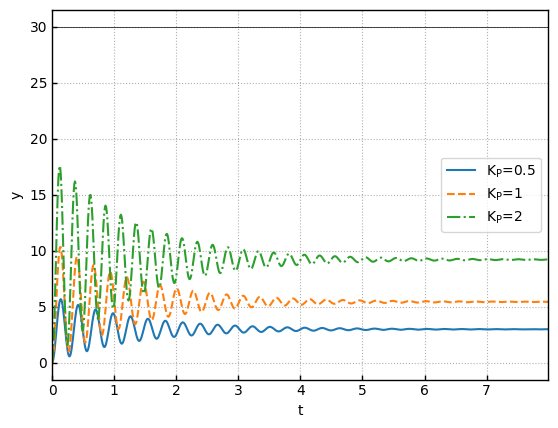

In [31]:
kp = (0.5, 1, 2)
P_Control(kp, 8)

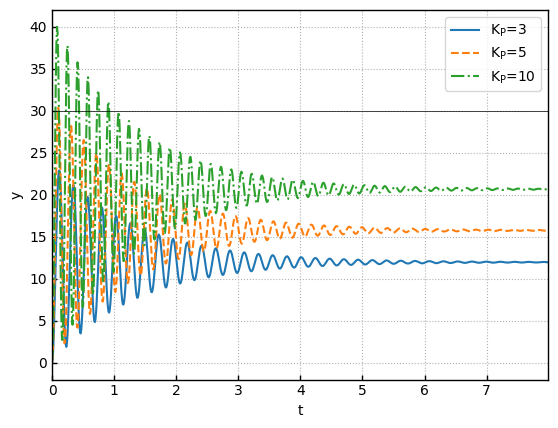

In [34]:
kp = (3, 5, 10)
P_Control(kp, 8)